In [12]:
import numpy as np
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
A=pd.read_csv(r"C:\Users\SUKRUTI\Desktop\Market_Basket_Optimisation.csv",header=None)

In [14]:
A.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [16]:
A.describe

<bound method NDFrame.describe of                  0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs               NaN   
2           chutney                NaN          NaN               NaN   
3            turkey            avocado          NaN               NaN   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread               NaN   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken                NaN          NaN               NaN   
7499       escalope          green tea          NaN               NaN   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green g

In [17]:
Transcations = []
for i in range(0,7500):
    Transcations.append([str(A.values[i][j]) for j in range(0,20)])

In [18]:
trans_rules=apriori(Transcations,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2)
results=list(trans_rules)
print(results[:50])

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]), RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)]), RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005866666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.700185158809287)]), RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.0033333333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=

In [19]:
def inspect(results):
    prod_1=[tuple(result[2][0][0])[0] for result in results]
    prod_2=[tuple(result[2][0][1])[0] for result in results]
    conf=[tuple(result[2][0][0])[0] for result in results]
    lift=[tuple(result[2][0][0])[0] for result in results]
    support=[result[1] for result in results]
    return list(zip(prod_1, prod_2, support,lift,conf))

In [20]:
res_A = pd.DataFrame(inspect(results), columns = ['Prod_1', 'Prod_2', 'Support', 'Lift', 'Confidence'])
res_A.nlargest(n = 10, columns = 'Support')

,Prod_1,Prod_2,Support,Lift,Confidence
4,herb & pepper,ground beef,0.016000,herb & pepper,herb & pepper
43,herb & pepper,ground beef,0.016000,herb & pepper,herb & pepper
30,spaghetti,ground beef,0.008667,spaghetti,spaghetti
95,spaghetti,ground beef,0.008667,spaghetti,spaghetti
7,whole wheat pasta,olive oil,0.008000,whole wheat pasta,whole wheat pasta
60,whole wheat pasta,olive oil,0.008000,whole wheat pasta,whole wheat pasta
34,mineral water,frozen vegetables,0.007200,mineral water,mineral water
55,milk,olive oil,0.007200,milk,milk
102,mineral water,frozen vegetables,0.007200,mineral water,mineral water
128,milk,olive oil,0.007200,milk,milk


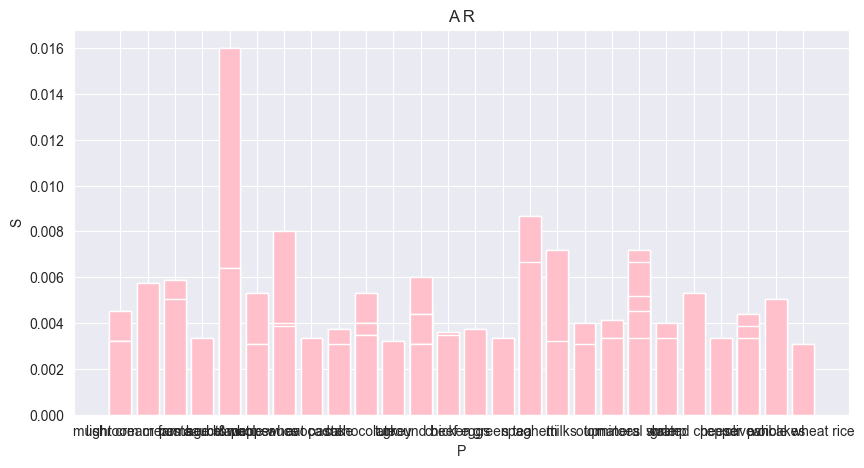

In [21]:
sb.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title("A R")
plt.xlabel("P")
plt.ylabel("S")
plt.bar(res_A['Prod_1'],res_A['Support'],color="pink")
plt.show()
              